In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,CuDNNLSTM

In [79]:
mnsit = tf.keras.datasets.mnist

In [80]:
(X_train,y_train),(X_test,y_test)=mnsit.load_data()

In [81]:
X_train = X_train/255.0
X_test = X_test/255.0

In [82]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [97]:
from keras.utils import to_categorical

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [84]:
model = Sequential()

In [85]:
model.add(LSTM(128,input_shape=(X_train.shape[1:]),activation='relu', return_sequences=True))

In [86]:
model.add(Dropout(0.2))

In [87]:
model.add(LSTM(64,activation='relu'))

In [88]:
model.add(Dropout(0.2))

In [89]:
model.add(Dense(32,activation='relu'))

In [90]:
model.add(Dropout(0.2))

In [91]:
model.add(Dense(10,activation='softmax'))

In [92]:
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

In [98]:
model.compile(loss='categorical_crossentropy',
             optimizer = opt,
             metrics=['accuracy'])

In [99]:
model.fit(X_train,y_train,epochs=3,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 88s 1ms/step - loss: 0.2428 - acc: 0.9331 - val_loss: 0.1169 - val_acc: 0.9662
Epoch 2/3
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1180 - acc: 0.9689 - val_loss: 0.1016 - val_acc: 0.9726
Epoch 3/3
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0933 - acc: 0.9766 - val_loss: 0.0588 - val_acc: 0.9809


In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total para

In [75]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [60]:
result = model.predict([X_test])[1]

In [73]:
model.predict(X_test[0:1])[0]

array([6.26732260e-12, 1.46040104e-08, 4.24185430e-07, 7.60586090e-07,
       1.03438058e-09, 1.62116294e-07, 3.00378381e-14, 9.99993920e-01,
       1.72049397e-08, 4.72147212e-06], dtype=float32)

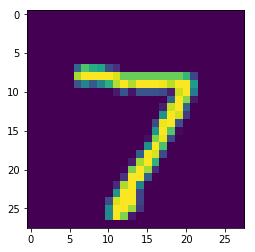

In [74]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0])
plt.show()

In [62]:
result.argmax()

2